In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Create a barplot
sns.set(style="whitegrid")  # Set the style of the plot

In [57]:
df = pd.read_csv('../data/preprocessed.csv',index_col=[0])

In [58]:
df.dtypes

userName     object
itemName     object
brand        object
category     object
price        object
rating      float64
vote          int64
user_id       int64
item_id       int64
dtype: object

In [59]:
print('Count of unique users ' + str(df['userName'].nunique()))
print('Count of unique items ' + str(df['itemName'].nunique()))


Count of unique users 17076
Count of unique items 9519


Distribution plot of the brand,category and itemName.
*   'KIND' is most common brand includs 2.5% of the items.
*   'Pet_Supplies' is most common category includs 60% of the items.
*   Most common item is 'Puppia Dog Harnesses'

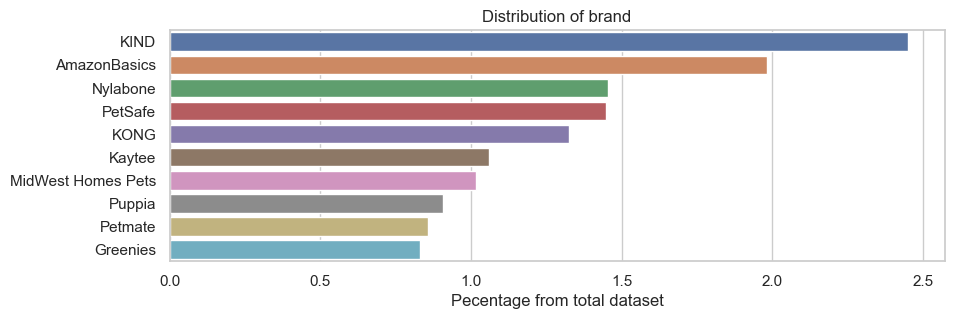

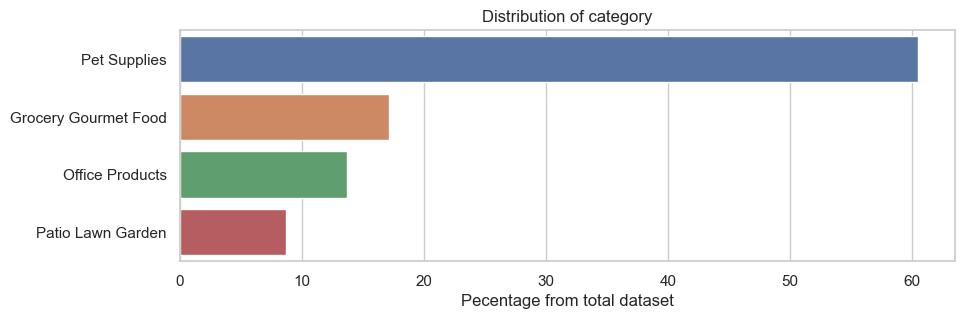

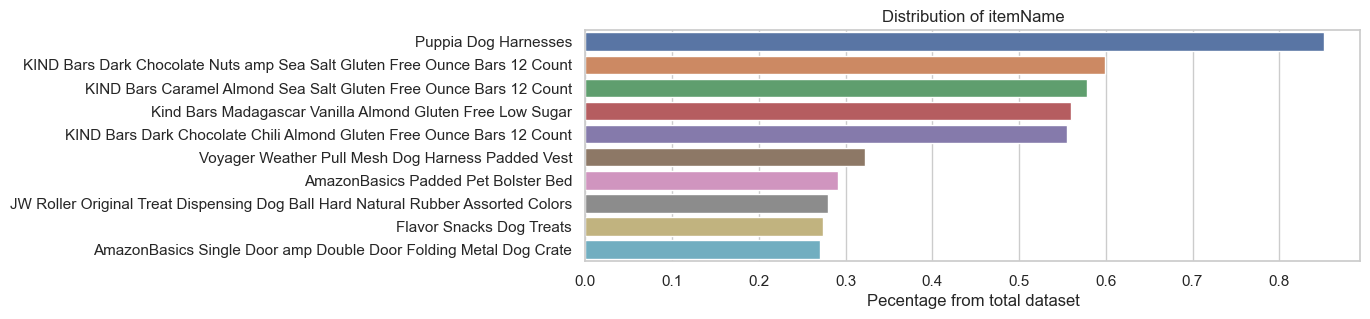

In [60]:
# Function to plot histogram for a categorical column
def plot_histogram(df,column, title,top_n):
    total_samples = len(df)
    data_counts = df[column].value_counts()/total_samples*100
    plt.figure(figsize=(10, 3))
    sns.barplot(x=(data_counts.values[:top_n]), y=(data_counts.index[:top_n]))
    plt.title(title)
    plt.xlabel('Pecentage from total dataset')
    plt.show()

# Plot histograms for the categorical columns
plot_histogram(df, 'brand', 'Distribution of brand',10)
plot_histogram(df, 'category', 'Distribution of category',10)
plot_histogram(df, 'itemName', 'Distribution of itemName',10)

Histogram plot of the rating distribution.
*   More than 70% of the reviews rated as 5.
*   Only 10% of the reviews are rated as 1 or 2.
*   Average rating is 4.39 - which may be considered a good baseling for prediction of the rating.

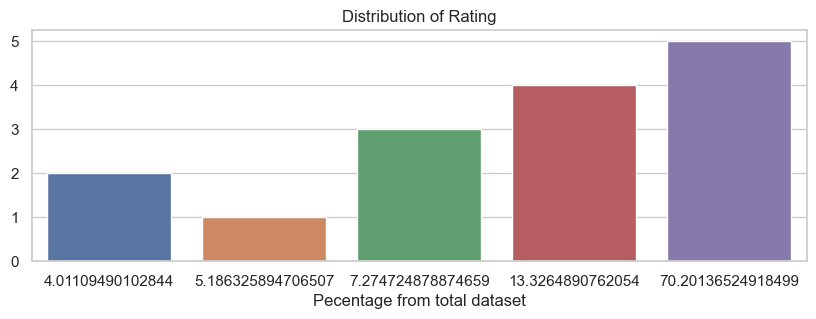

Average rating is 4.3934547288413395


In [61]:
plot_histogram(df, 'rating', 'Distribution of Rating',5)
print('Average rating is ' + str(df['rating'].mean()))

Convert price format of '$5.1' into float of 5.1

In [62]:
df = df[df['price'].str.match(r'\$\d+(\.\d{2})?$')]
df['price'] = df['price'].str.replace('$', '').astype(float)

c:\Users\U-5058\.conda\envs\rs-amazon\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


Histrogram plot of the prices shows that most of the items are below of 100$,most of them are around 20$

Price mean 19.145844837256426


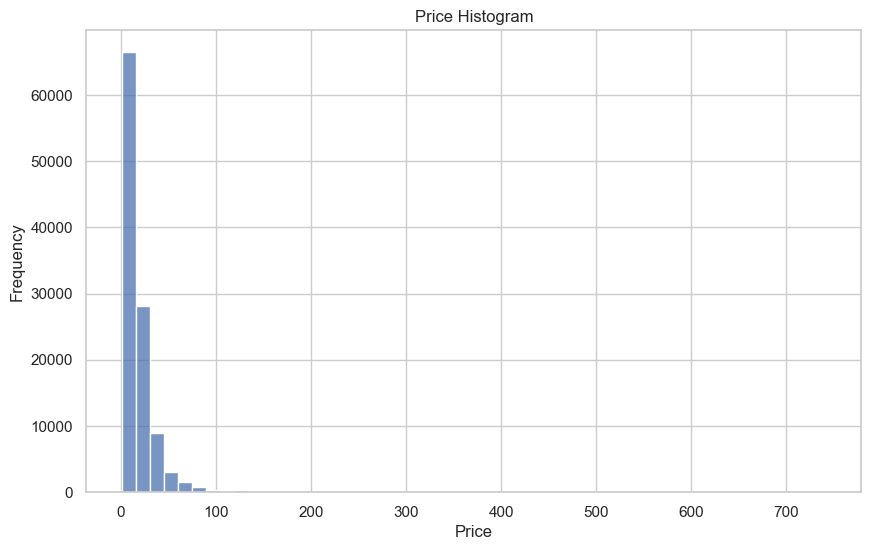

In [63]:
print('Price mean ' + str(df['price'].mean()))
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50) 
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Histogram')
plt.show()

All the items that cost more than 500$ are rated above 2

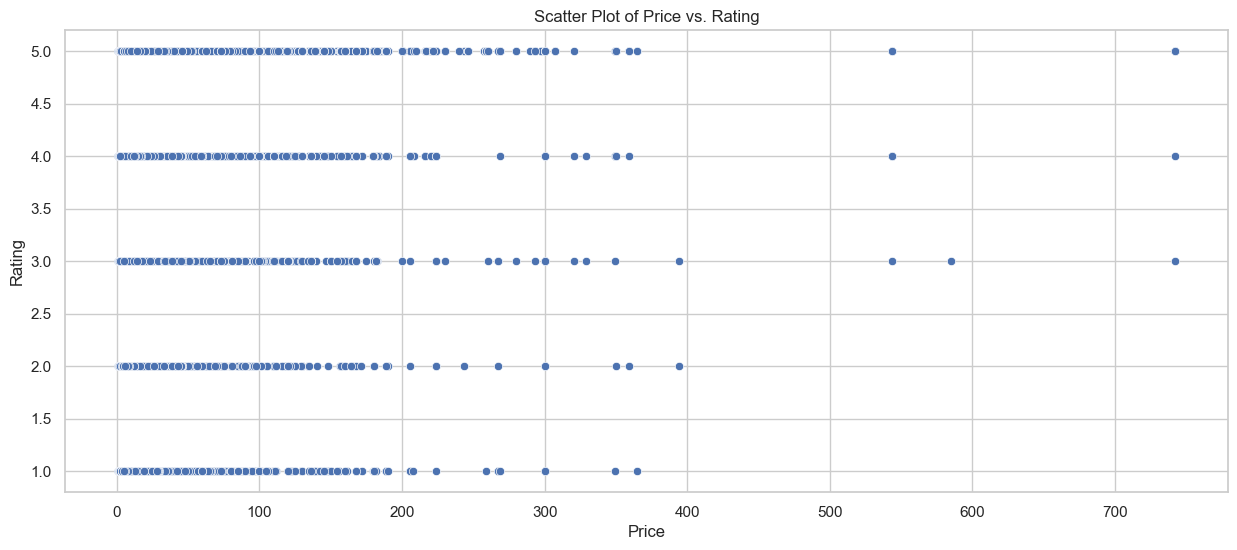

In [66]:
# Create a scatter plot using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(15, 6))
sns.scatterplot(x='price', y='rating', data=df)
plt.xlabel('Price')
plt.ylabel('Rating')
plt.title('Scatter Plot of Price vs. Rating')
plt.show()